# GRO620 - Activité procédurale 3

In [2]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive

## Filtrage linéaire - suite

### Q1.1

Soit cette image :

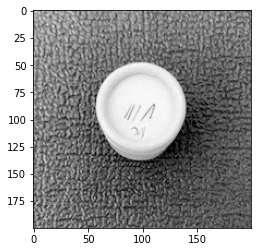

In [3]:
img_q11_org  = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q11_mono = np.float32(cv2.cvtColor(img_q11_org, cv2.COLOR_BGR2GRAY)) / 255.
plt.imshow(img_q11_mono, cmap="gray")

Utilisez un filtre linéaire de Sobel (voir sections 3.2.1 et 4.2.1) pour faire ressortir les contours de cette image.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1bd4d8c2620>)

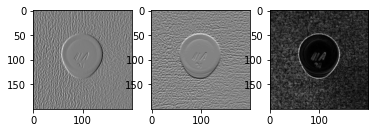

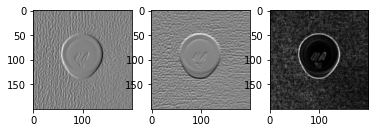

In [3]:
k_sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * (1/8.)

k_sobel_y = np.transpose(k_sobel_x)

img_sobel_x = cv2.filter2D(img_q11_mono, -1, k_sobel_x)
img_sobel_y = cv2.filter2D(img_q11_mono, -1, k_sobel_y)

img_sobel = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

plt.figure()
plt.subplot(1,3,1), plt.imshow(img_sobel_x, cmap="gray")
plt.subplot(1,3,2), plt.imshow(img_sobel_y, cmap="gray")
plt.subplot(1,3,3), plt.imshow(img_sobel, cmap="gray")

# ou

img_sobel_x = cv2.Sobel(img_q11_mono, cv2.CV_64F, 1, 0, ksize=5)
img_sobel_y = cv2.Sobel(img_q11_mono, cv2.CV_64F, 0, 1, ksize=5)

img_sobel = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

plt.figure()
plt.subplot(1,3,1), plt.imshow(img_sobel_x, cmap="gray")
plt.subplot(1,3,2), plt.imshow(img_sobel_y, cmap="gray")
plt.subplot(1,3,3), plt.imshow(img_sobel, cmap="gray")

## Filtrage non-linéaire

### Q2.1

Soit cette image :

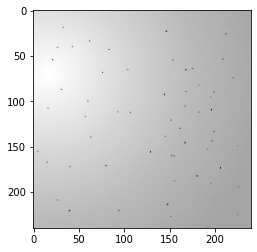

In [4]:
img_q21_org = cv2.imread("images_doc/proc2-q3-sand.png")
img_q21_mono = cv2.cvtColor(img_q21_org, cv2.COLOR_BGR2GRAY)
plt.imshow(img_q21_mono, cmap="gray")

Utilisez un filtre **non-linéaire** pour tenter de retirer les points noirs dans l'image.

c:\Users\Tony's Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Tony's Laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


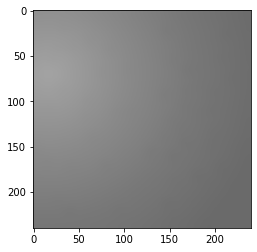

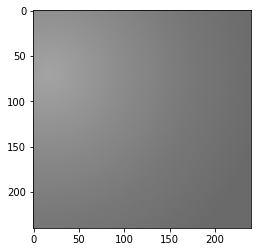

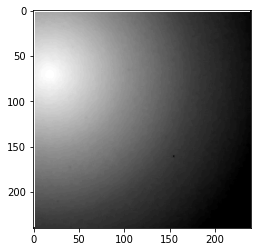

In [5]:
img_q21_filt = img_q21_org.copy() # Org et non mono

for i in range(2):
    img_q21_filt = cv2.bilateralFilter(img_q21_filt, 15, 5000, 5000)

plt.imshow(img_q21_filt, cmap="gray")

# ou
img_q21_filt = img_q21_org.copy()

img_q21_filt = cv2.medianBlur(img_q21_filt, 5)
plt.figure()
plt.imshow(img_q21_filt, cmap="gray")

# ou handmade

img_q21_filt = img_q21_mono.copy()
img_filt = np.zeros(img_q21_filt.shape)

kernel = 5
middle = kernel // 2

for i in range(img_q21_filt.shape[0]):
    for j in range(img_q21_filt.shape[1]):
        if (i < (0 + middle) or i > img_q21_filt.shape[0]-1-middle) and (j < (0 + middle) or j > img_q21_filt.shape[1]-1-middle):
            img_filt[i,j] = img_q21_filt[i,j]
        else:
            img_filt[i,j] = np.median(img_q21_filt[i-middle:i+middle, j-middle:j+middle])

plt.figure()
plt.imshow(img_filt, cmap="gray")

## Chaîne de filtrage

### Q3.1

En reprenant la figure originale de la question Q1.1, appliquez une succession de filtres pour mieux isoler le contour de l'objet au centre de l'image.

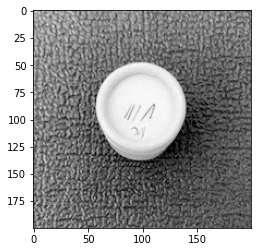

In [6]:
img_q31 = img_q11_mono
plt.imshow(img_q31, cmap="gray")


### Q3.2

Répétez l'exercice précédent, mais avec un filtre de Canny.

In [7]:
img_q32 = img_q11_org



## Analyse de formes

### Q4.1

Soit cette image :

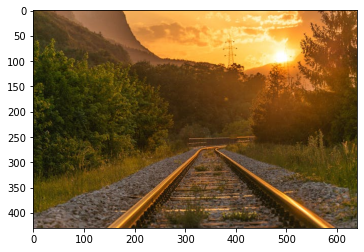

In [8]:
img_q41_org  = cv2.imread("images_doc/proc3-q4-tracks.jpeg")
img_q41_rgb = cv2.cvtColor(img_q41_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_q41_rgb)

(Source de l'image originale : [Krivec Ales, Pexels](https://www.pexels.com/photo/clouds-cloudy-country-distance-552779/))

Trouvez et tracez les lignes dominantes à l'aide de la transformée de Hough.

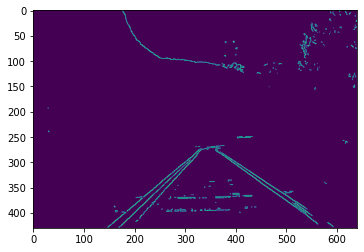

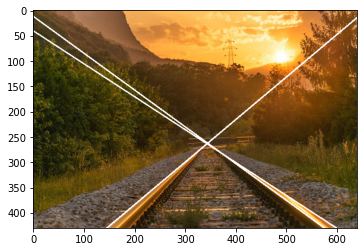

In [9]:
img_q41_mono = cv2.cvtColor(img_q41_rgb, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img_q41_rgb,400,500,apertureSize = 3)

plt.imshow(edges)

lines = cv2.HoughLines(edges, 1, np.pi/180, 150, None, 0, 0)
for line in lines:
    rho = line[0][0]
    theta = line[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img_q41_rgb,(x1,y1),(x2,y2),(255,255,255),2)

plt.figure()
plt.imshow(img_q41_rgb, cmap="gray")

### Q4.2

En reprenant l'image des questions Q1.1 et Q3.1, trouvez, tracez et afficher les coordonnées (en pixels) de la boîte (*bounding box*) contenant les contours de l'objet à l'aide de cv2.findContours()

(98, 92)


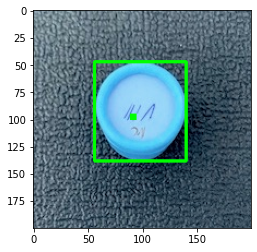

In [6]:
img_q41_out = img_q11_org.copy() # Pour le résultat

img_q41_out = cv2.GaussianBlur(img_q41_out, (5,5), cv2.BORDER_DEFAULT)
img_q41_out = cv2.cvtColor(img_q41_out,cv2.COLOR_BGR2GRAY)

img_q41_out = cv2.Canny(img_q41_out, 100, 200)

contours, hierarchy = cv2.findContours(img_q41_out, 1, 2)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
#img_q41_out = cv2.cvtColor(img_q41_out,cv2.COLOR_GRAY2RGB)
img_q11_print = img_q11_org.copy()
cv2.rectangle(img_q11_print,(x,y),(x+w,y+h),(0,255,0),2)


center = (x+w//2,y+h//2)
width = 3
img_q11_print[center[0]-width:center[0]+width, center[1]-width:center[1]+width] = (0,255,0)

plt.imshow(img_q11_print)

# Coordonnées du rectangle au centre
print(center)